<a href="https://colab.research.google.com/github/Marshmellowon/Mnist_VAE/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variational Auto Encoder

In [69]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [70]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape) #(60000, 28, 28)
print(y_train.shape) #(60000,)

(60000, 28, 28)
(60000,)


In [71]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    
    self.latent_dim = latent_dim   
    
    '''Encoder'''
    self.encoder = tf.keras.Sequential()
    self.encoder.add(layers.Flatten())
    
    for i in range(2):
        self.encoder.add(Dense(256))
        self.encoder.add(layers.BatchNormalization())
        self.encoder.add(layers.Activation(tf.keras.activations.relu))

    self.encoder.add(Dense(latent_dim))


      # layers.Flatten(),
      # layers.Dense(latent_dim, activation='relu'),
    

    '''Decoder'''
    self.decoder = tf.keras.Sequential()
    for i in range(2):
        self.decoder.add(Dense(256))
        self.decoder.add(layers.BatchNormalization())
        self.decoder.add(layers.Activation(tf.keras.activations.sigmoid))


    self.decoder.add(Dense(784, activation='sigmoid'))
    self.decoder.add(layers.Reshape((28,28)))

    
    #   layers.Dense(784, activation='sigmoid'),
    #   layers.Reshape((28, 28))
    

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [72]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0394 - val_loss: 0.0124
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0131 - val_loss: 0.0090
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0106 - val_loss: 0.0077
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0094 - val_loss: 0.0071
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0081 - val_loss: 0.0062
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0077 - val_loss: 0.0059
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0074 - val_loss: 0.0057
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0071 - val_loss: 0.0055
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

In [73]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

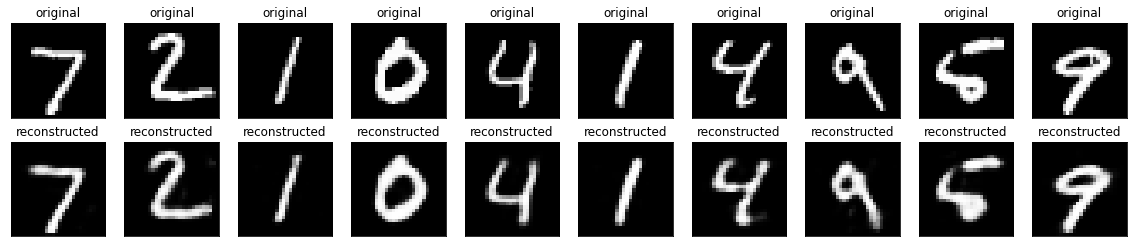

In [74]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0439 - val_loss: 0.0094
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0040 - val_loss: 0.0039
<tensorflow.python.keras.callbacks.History at 0x7f10ea893588>

# encoder 변형
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0347 - val_loss: 0.0084
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0100 - val_loss: 0.0066
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0081 - val_loss: 0.0056
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0072 - val_loss: 0.0051
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0066 - val_loss: 0.0047
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0062 - val_loss: 0.0045
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0058 - val_loss: 0.0041
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0056 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0050 - val_loss: 0.0037
<tensorflow.python.keras.callbacks.History at 0x7f10e5f8e4a8>